# IMDB Reviews NLP

Main Data Frames information.

train = Master copy of all the train datasets, both consisting of pos and neg review.

test = Master copy of all the test datasets, both consisting of pos and neg review.

usup_df= holds the usup data.


In [1]:
%cd C:\Users\Nischay\Downloads\Digital Vidya\Data Science using Python\Capstone Project


import os
import pandas as pd
import numpy as np
import string
import re
import operator
import matplotlib.pyplot as plt
%matplotlib inline
import time
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

path="C:/Users/Nischay/Downloads/Digital Vidya/Data Science using Python/Capstone Project/"

C:\Users\Nischay\Downloads\Digital Vidya\Data Science using Python\Capstone Project


In [27]:
def rem_sw(df):
    # Downloading stop words
    stop_words = ['all', 'just', 'being', 'over', 'both', 'through', 'yourselves', 'its', 'before', 'herself', 'had', 'should', 'to', 'only', 'under', 'ours', 'has', 'do', 'them', 'his', 'very', 'they',
         'not', 'during', 'now', 'him', 'nor', 'did', 'this', 'she', 'each', 'further', 'where', 'few', 'because', 'doing', 'some', 'are', 'our', 'ourselves', 'out', 'what', 'for', 'while', 'does', 'above', 'between', 't',
         'be', 'we', 'who', 'were', 'here', 'hers', 'by', 'on', 'about', 'of', 'against', 's', 'or', 'own', 'into', 'yourself', 'down', 'your', 'from', 'her', 'their', 'there', 'been', 'whom', 'too', 'themselves', 'was',
         'until', 'more', 'himself', 'that', 'but', 'don', 'with', 'than', 'those', 'he', 'me', 'myself', 'these', 'up', 'will', 'below', 'can', 'theirs', 'my', 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at',
         'have', 'in', 'any', 'if', 'again', 'no', 'when', 'same', 'how', 'other', 'which', 'you', 'after', 'most', 'such', 'why', 'a', 'off', 'i', 'yours', 'so', 'the', 'having', 'once','terribl','wast','movi','horribl','amaz','suppos','stori','charact','realli']
    # Removing Stop words from training data
    count = 0
    for sentence in df:
        sentence = [word for word in sentence.lower().split() if word not in stop_words]
        sentence = ' '.join(sentence)
        df.loc[count] = sentence
        count+=1
    return(df)

In [16]:
def rem_punc(df):
    count = 0
    for s in df:
        cleanr = re.compile('<.*?>')
        s = re.sub(r'\d+', '', s)
        s = re.sub(cleanr, '', s)
        s = re.sub("'", '', s)
        s = re.sub(r'\W+', ' ', s)
        s = s.replace('_', '')
        s = s.replace('br',' ')
        df.loc[count] = s
        count+=1
    return(df)

In [17]:
def lemma(df):

    lmtzr = WordNetLemmatizer()

    count = 0
    stemmed = []
    for sentence in df:    
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(lmtzr.lemmatize(word))
        sentence = ' '.join(stemmed)
        df.iloc[count] = sentence
        count+=1
        stemmed = []
    return(df)

In [18]:
def stemma(df):

    stemmer = PorterStemmer() #SnowballStemmer("english", ignore_stopwords=True)

    count = 0
    stemmed = []
    for sentence in df:
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(stemmer.stem(word))
        sentence = ' '.join(stemmed)
        df.iloc[count] = sentence
        count+=1
        stemmed = []
    return(df)

In [19]:
def get_feature(df, number):
    
    feature_list = []
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['review'])

    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['label'])

    # fit the model
    tree_clf.fit(x_train, y)
    
    # Preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Create the feature list
    for f in range(number):
        feature_list.append(sorted_features[f][0])
    
    return(feature_list)

In [20]:
def print_feature(df):
    
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['review'])

    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['label'])

    # fit the model
    tree_clf.fit(x_train, y)

    # Preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(20):
        print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

    # Plot the feature importances of the forest
    plt.figure(figsize = (20,20))
    plt.title("Feature importances")
    plt.bar(range(100), importances[indices[:100]],
           color="r", align="center")
    plt.xticks(range(100), sorted_features[:100], rotation=90)
    plt.xlim([-1, 100])
    plt.show()

    return()

# Phase 01 : Cleaning.

Train Data.

In [11]:
#positive reviews raw text data.
#train text 
pos_txt_train=[x for x in os.listdir(path+"train/pos/") 
if x.endswith(".txt")]
#test text
pos_txt_test=[x for x in os.listdir(path+"test/pos/")
if x.endswith(".txt")]

In [12]:
#negative reviews raw text data.
#train text
neg_txt_train=[x for x in os.listdir(path+"train/neg/")
if x.endswith(".txt")]
#test text
neg_txt_test=[x for x in os.listdir(path+"test/neg/")
if x.endswith(".txt")]

In [13]:
pos_rev_train=[]
neg_rev_train=[]

#append each text file.
for posfile in pos_txt_train:
    with open(path+"train/pos/"+posfile, encoding="latin1") as f:
        pos_rev_train.append(f.read())
        
for negfile in neg_txt_train:
    with open(path+"train/neg/"+negfile,encoding="latin1") as f:
        neg_rev_train.append(f.read())        

In [14]:
#positive and negative dataset

pos=pd.DataFrame({"review":pos_rev_train,"label":1})
neg=pd.DataFrame({"review":neg_rev_train,"label":0})

In [15]:
#combining both positive and negative.
train = pd.concat([pos,neg], ignore_index=True)
train.head()

,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [16]:
#text to csv file coversion.
train.to_csv("train_df.csv")

In [17]:
train_df=pd.read_csv('train_df.csv')
train_df.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
train_df.head()

,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


Test Data.

In [19]:
pos_rev_test=[]
neg_rev_test=[]

In [20]:
#append the text files.
for posfile in pos_txt_test:
    with open(path+"test/pos/"+posfile,encoding='latin1') as f:
        pos_rev_test.append(f.read())

for negfile in neg_txt_test:
    with open(path+"test/neg/"+negfile,encoding='latin1') as f:
        neg_rev_test.append(f.read())

In [21]:
pos1=pd.DataFrame({"review":pos_rev_test,"label":1})
neg1=pd.DataFrame({"review":neg_rev_test,"label":0})

In [22]:
#combining both positive and negative.
test = pd.concat([pos1,neg1], ignore_index=True)
test.head()

,review,label
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [23]:
test.to_csv("test_df.csv")

In [24]:
test_df=pd.read_csv('test_df.csv')
test_df.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
test_df.head()

,review,label
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [34]:
#stopwords removal.
train_df['review'] = rem_sw(train_df['review'])
train_df.head()

,review,label
0,bromwell high cartoon comedy. ran time program...,1
1,homelessness (or houselessness george carlin s...,1
2,brilliant over-acting lesley ann warren. best ...,1
3,easily underrated film inn brooks cannon. sure...,1
4,typical mel brooks film. much less slapstick m...,1


In [35]:
test_df['review'] = rem_sw(test_df['review'])
test_df.head()

,review,label
0,went saw movie last night coaxed friends mine....,1
1,actor turned director bill paxton follows prom...,1
2,"recreational golfer knowledge sport's history,...",1
3,"saw film sneak preview, delightful. cinematogr...",1
4,bill paxton taken true story 1913 us golf open...,1


In [36]:
#punctuation removal.
train_df['review'] = rem_punc(train_df['review'])
train_df.head()

,review,label
0,omwell high cartoon comedy ran time programs ...,1
1,homelessness or houselessness george carlin st...,1
2,illiant over acting lesley ann warren best dr...,1
3,easily underrated film inn ooks cannon sure f...,1
4,typical mel ooks film much less slapstick mov...,1


In [37]:
test_df['review'] = rem_punc(test_df['review'])
test_df.head()

,review,label
0,went saw movie last night coaxed friends mine ...,1
1,actor turned director bill paxton follows prom...,1
2,recreational golfer knowledge sports history p...,1
3,saw film sneak preview delightful cinematograp...,1
4,bill paxton taken true story us golf open made...,1


In [38]:
#lemmatizing text data.
train_df['review'] = lemma(train_df['review'])
train_df.head()

,review,label
0,omwell high cartoon comedy ran time program sc...,1
1,homelessness or houselessness george carlin st...,1
2,illiant over acting lesley ann warren best dra...,1
3,easily underrated film inn ooks cannon sure fl...,1
4,typical mel ooks film much le slapstick movie ...,1


In [39]:
test_df['review'] = lemma(test_df['review'])
test_df.head()

,review,label
0,went saw movie last night coaxed friend mine i...,1
1,actor turned director bill paxton follows prom...,1
2,recreational golfer knowledge sport history pl...,1
3,saw film sneak preview delightful cinematograp...,1
4,bill paxton taken true story u golf open made ...,1


In [40]:
#stemming text data.
train_df['review'] = stemma(train_df['review'])
train_df.head()

,review,label
0,omwel high cartoon comedi ran time program sch...,1
1,homeless or houseless georg carlin state issu ...,1
2,illiant over act lesley ann warren best dramat...,1
3,easili underr film inn ook cannon sure flaw gi...,1
4,typic mel ook film much le slapstick movi actu...,1


In [41]:
test_df['review'] = stemma(test_df['review'])
test_df.head()

,review,label
0,went saw movi last night coax friend mine ill ...,1
1,actor turn director bill paxton follow promis ...,1
2,recreat golfer knowledg sport histori pleas di...,1
3,saw film sneak preview delight cinematographi ...,1
4,bill paxton taken true stori u golf open made ...,1


In [42]:
train_df.to_csv('train_final.csv')
test_df.to_csv('test_final.csv')

Feature ranking:
feature 49506 : wast (0.004836)
feature 3174 : bad (0.004423)
feature 20558 : horribl (0.004325)
feature 50618 : worst (0.004274)
feature 18202 : great (0.003625)
feature 14310 : excel (0.003514)
feature 33758 : perfect (0.003443)
feature 2944 : aw (0.003047)
feature 2931 : avoid (0.002727)
feature 37672 : ridicul (0.002692)
feature 1204 : also (0.002551)
feature 46069 : touch (0.002483)
feature 34814 : poor (0.002481)
feature 4326 : best (0.002449)
feature 47742 : unless (0.002396)
feature 13670 : enjoy (0.002308)
feature 43422 : stupid (0.002247)
feature 50610 : wors (0.002156)
feature 25160 : laughabl (0.002147)
feature 26407 : love (0.002122)


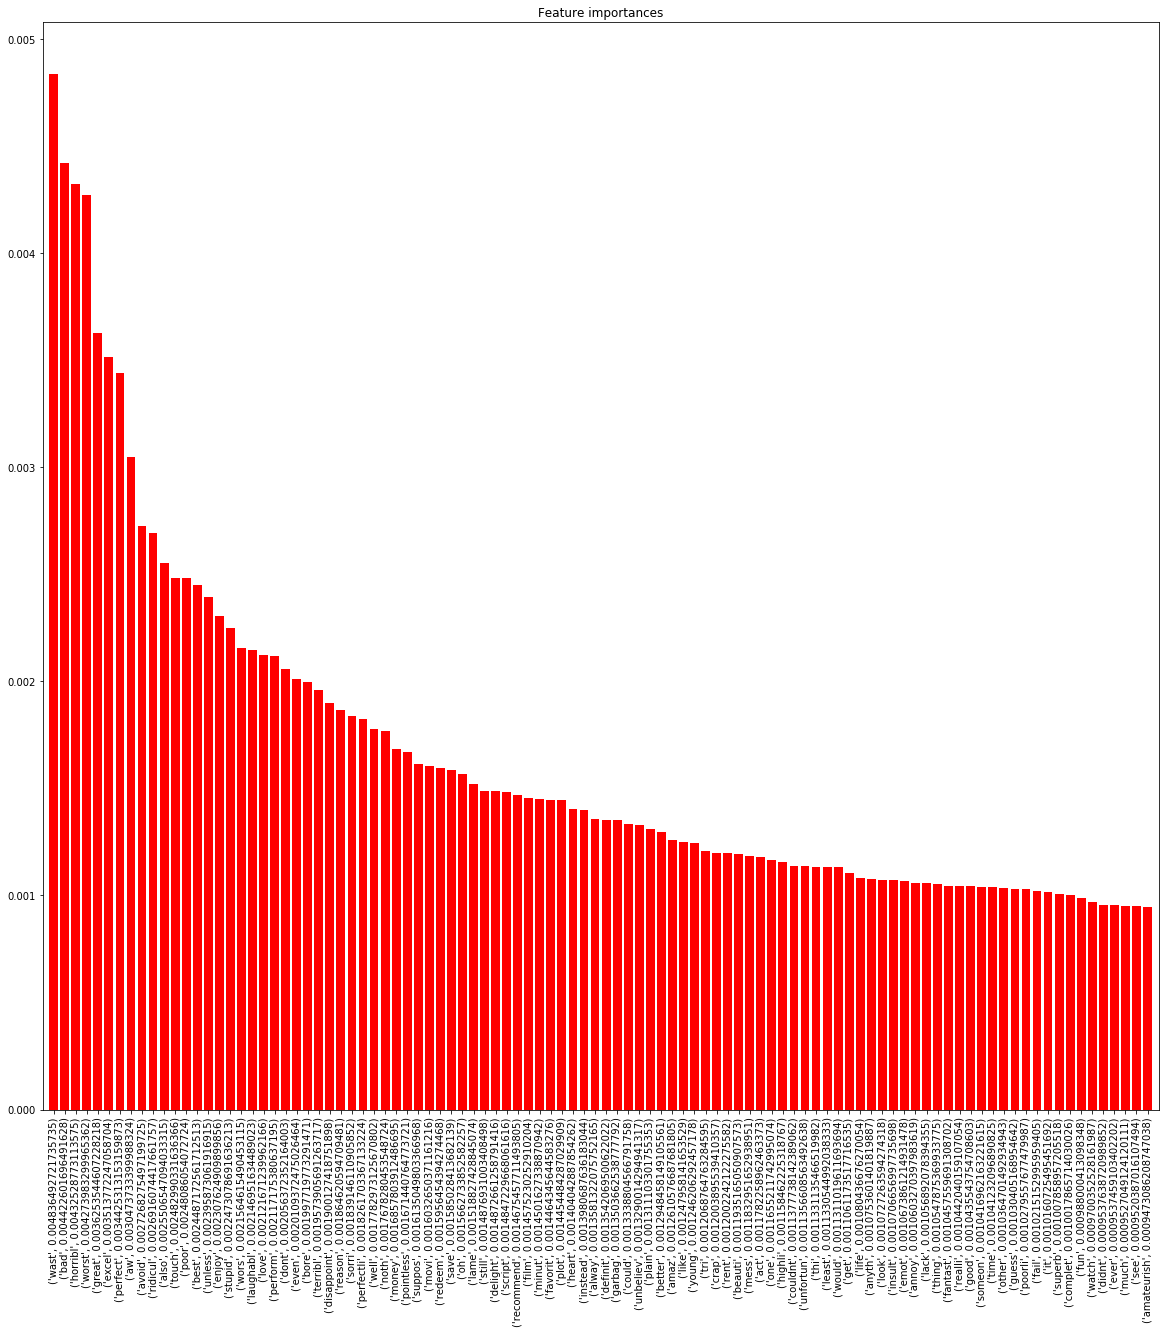

()

In [43]:
print_feature(train_df)

Feature ranking:
feature 50076 : worst (0.010249)
feature 48931 : wast (0.006756)
feature 14312 : excel (0.005861)
feature 50071 : wors (0.004981)
feature 3136 : bad (0.004159)
feature 33355 : perfect (0.003633)
feature 18230 : great (0.003101)
feature 34454 : poor (0.002726)
feature 26173 : love (0.002676)
feature 29108 : money (0.002526)
feature 13690 : enjoy (0.002379)
feature 4264 : best (0.002373)
feature 1311 : amaz (0.002349)
feature 49171 : well (0.002335)
feature 14193 : even (0.002264)
feature 34180 : plot (0.002149)
feature 41509 : sorri (0.002142)
feature 5275 : bore (0.002138)
feature 49924 : wonder (0.002125)
feature 39105 : script (0.002079)


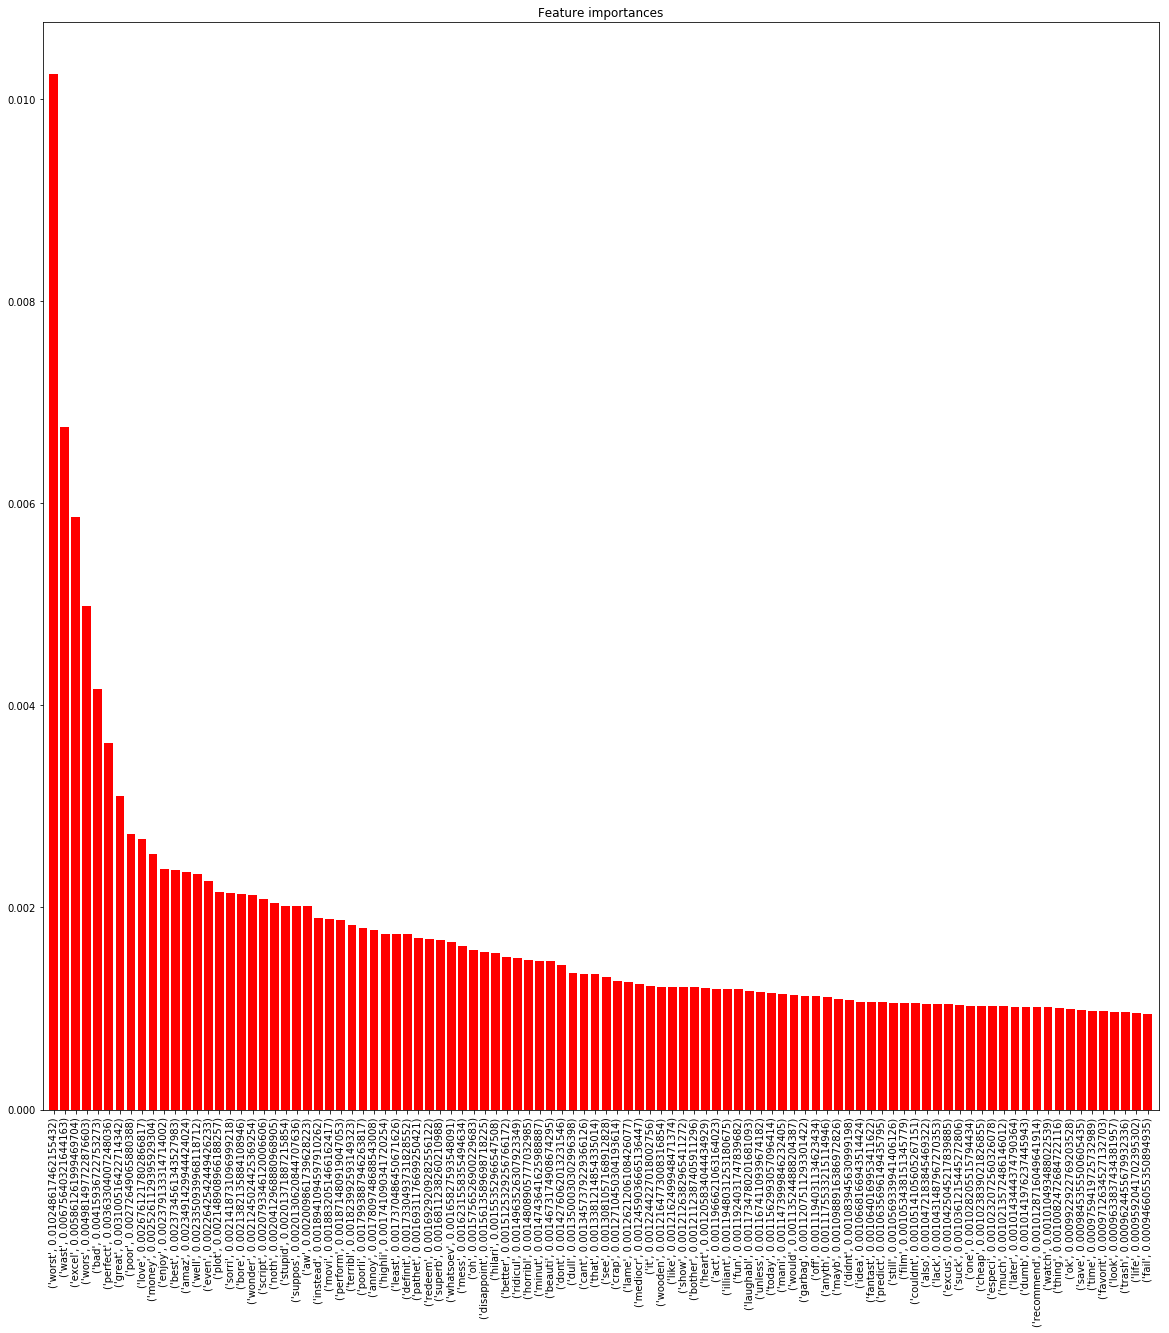

()

In [44]:
print_feature(test_df)

In [38]:
train_final=pd.read_csv('train_final.csv')
test_final=pd.read_csv('test_final.csv')

In [39]:
train_final.drop('Unnamed: 0',axis=1,inplace=True)
test_final.drop('Unnamed: 0',axis=1,inplace=True)

In [40]:
train_final.head()

,review,label
0,omwel high cartoon comedi ran time program sch...,1
1,homeless or houseless georg carlin state issu ...,1
2,illiant over act lesley ann warren best dramat...,1
3,easili underr film inn ook cannon sure flaw gi...,1
4,typic mel ook film much le slapstick movi actu...,1


In [41]:
test_final.head()

,review,label
0,went saw movi last night coax friend mine ill ...,1
1,actor turn director bill paxton follow promis ...,1
2,recreat golfer knowledg sport histori pleas di...,1
3,saw film sneak preview delight cinematographi ...,1
4,bill paxton taken true stori u golf open made ...,1


# Phase 02:Explolration.

1.Most common words.

Positive

In [6]:
df_freq=pd.concat([train_final,test_final],ignore_index=True)

# Vectorizing positive reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq[df_freq['label']==1].review)

# Visualising the high frequency words for negative set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df_freq.nlargest(10, 'frequency')

,frequency
film,50860
movi,44822
like,20554
time,16619
good,15257
stori,14180
charact,14017
make,13807
great,13123
watch,12905


Negative

In [8]:
df_freq=pd.concat([train_final,test_final],ignore_index=True)

# Vectorizing negative reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq[df_freq['label']==0].review)

# Visualising the high frequency words for negative set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df_freq.nlargest(10, 'frequency')

,frequency
movi,58387
film,44962
like,24640
make,16205
time,15317
watch,14965
good,14918
bad,14776
charact,14319
realli,12353


2.Highest and Lowest Frequncy Words

In [9]:
df_freq=pd.concat([train_final,test_final],ignore_index=True)

# Vectorizing complete review set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq.review)

# Visualising the high and low frequency words for complete set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
print(df_freq.nlargest(1, 'frequency'), sep='\n')
print(df_freq.nsmallest(1, 'frequency'), sep='\t')

      frequency
movi     103209
                            frequency
aaaaaaaaaaaahhhhhhhhhhhhhh          1


# Unsupervised Data.

In [10]:
path = "C:/Users/Nischay/Downloads/Digital Vidya/Data Science using Python/Capstone Project/"

In [11]:
txt_train=[x for x in os.listdir(path+"train/unsup/") 
if x.endswith(".txt")]

In [12]:
rev_train=[]

#append each text file.
for file in txt_train:
    with open(path+'train/unsup/'+file ,encoding='latin1') as f:
        rev_train.append(f.read())

In [13]:
#forming a data set.
unsup_df=pd.DataFrame({'review':rev_train,'label':'unsup'})
unsup_df.head()

,review,label
0,"I admit, the great majority of films released ...",unsup
1,"Take a low budget, inexperienced actors doubli...",unsup
2,"Everybody has seen 'Back To The Future,' right...",unsup
3,Doris Day was an icon of beauty in singing and...,unsup
4,"After a series of silly, fun-loving movies, 19...",unsup


In [21]:
#stopwords removal,
unsup_df['review'] = rem_sw(unsup_df['review'])
unsup_df.head()

,review,label
0,"admit, great majority films released say 1933 ...",unsup
1,"take low budget, inexperienced actors doubling...",unsup
2,"everybody seen 'back future,' right? whether l...",unsup
3,doris day icon beauty singing acting warm voic...,unsup
4,"series silly, fun-loving movies, 1955 big year...",unsup


In [22]:
#remove punctuation.
unsup_df['review'] = rem_punc(unsup_df['review'])
unsup_df.head()

,review,label
0,admit great majority films released say me doz...,unsup
1,take low budget inexperienced actors doubling ...,unsup
2,everybody seen back future right whether like ...,unsup
3,doris day icon beauty singing acting warm voic...,unsup
4,series silly fun loving movies big year doris ...,unsup


In [23]:
#lemmatizing text data.
unsup_df['review'] = lemma(unsup_df['review'])
unsup_df.head()

,review,label
0,admit great majority film released say me doze...,unsup
1,take low budget inexperienced actor doubling p...,unsup
2,everybody seen back future right whether like ...,unsup
3,doris day icon beauty singing acting warm voic...,unsup
4,series silly fun loving movie big year doris d...,unsup


In [24]:
#stemming text data.
unsup_df['review'] = stemma(unsup_df['review'])
unsup_df.head()

,review,label
0,admit great major film releas say me dozen maj...,unsup
1,take low budget inexperienc actor doubl produc...,unsup
2,everybodi seen back futur right whether like m...,unsup
3,dori day icon beauti sing act warm voic geniu ...,unsup
4,seri silli fun love movi big year dori day yea...,unsup


In [31]:
#kmeans clustering for unsupervised learning.
# Vectorizing dataset
# stop_words = ['all', 'just', 'being', 'over', 'both', 'through', 'yourselves', 'its', 'before', 'herself', 'had', 'should', 'to', 'only', 'under', 'ours', 'has', 'do', 'them', 'his', 'very', 'they',
#          'not', 'during', 'now', 'him', 'nor', 'did', 'this', 'she', 'each', 'further', 'where', 'few', 'because', 'doing', 'some', 'are', 'our', 'ourselves', 'out', 'what', 'for', 'while', 'does', 'above', 'between', 't',
#          'be', 'we', 'who', 'were', 'here', 'hers', 'by', 'on', 'about', 'of', 'against', 's', 'or', 'own', 'into', 'yourself', 'down', 'your', 'from', 'her', 'their', 'there', 'been', 'whom', 'too', 'themselves', 'was',
#          'until', 'more', 'himself', 'that', 'but', 'don', 'with', 'than', 'those', 'he', 'me', 'myself', 'these', 'up', 'will', 'below', 'can', 'theirs', 'my', 'and', 'then', 'is', 'am', 'it', 'an', 'as', 'itself', 'at',
#          'have', 'in', 'any', 'if', 'again', 'no', 'when', 'same', 'how', 'other', 'which', 'you', 'after', 'most', 'such', 'why', 'a', 'off', 'i', 'yours', 'so', 'the', 'having', 'once','terribl','wast','movi','horribl','amaz','suppos','stori','charact','realli']
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(unsup_df.review)
 
# Creating a k-means object and fitting it to target variable
k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=1)
model.fit(X)
 
# Visualising the 2 clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 movi
 like
 watch
 bad
 good
 realli
 time
 make
 film
 dont
Cluster 1:
 film
 movi
 like
 charact
 time
 stori
 good
 make
 watch
 great


# Phase 03:Visualization

# 1. Before Feature Selection.

# 01.Word Cloud.

Positive Sentiment.

In [32]:
#froming negative sentiment string.
pos_phrases=train_final[train_final.label==1]
pos_string=[]
for t in pos_phrases.review:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat( )
pos_text[:100]

'omwel high cartoon comedi ran time program school life teacher year teach profess lead believ omwel '

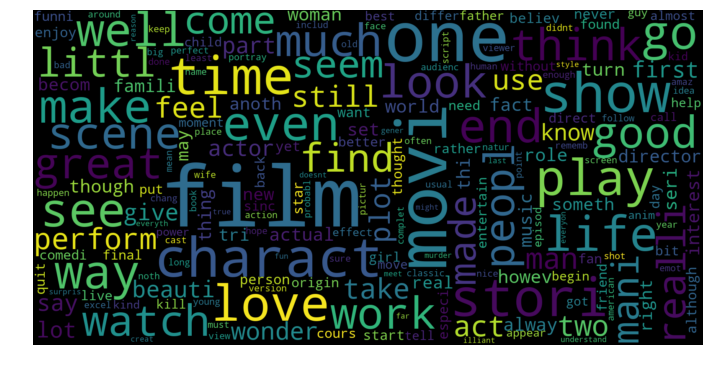

In [33]:
#postive word cloud.
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Negative Sentiment

In [34]:
#froming negative sentiment string.
neg_phrases=train_final[train_final.label==0]
neg_string=[]
for t in neg_phrases.review:
    neg_string.append(t)
neg_text = pd.Series(neg_string).str.cat( )
neg_text[:100]

'stori man unnatur feel pig start open scene terrif exampl absurd comedi formal orchestra audienc tur'

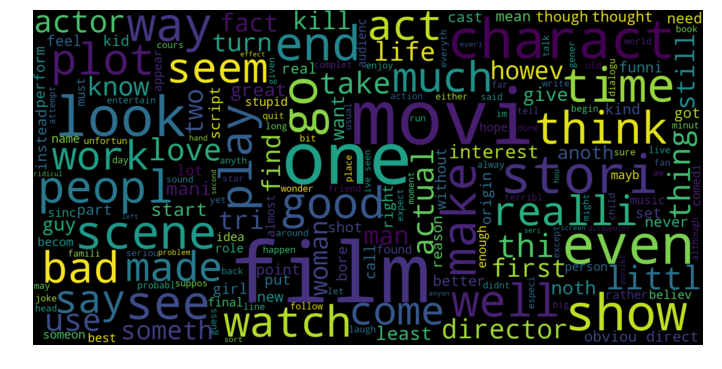

In [35]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 02.Histogram Distribution.

Text(0,0.5,'Number of Instances')

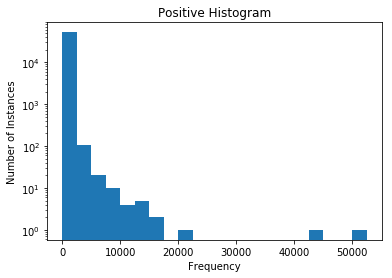

In [38]:
#positive data.
df_freq=pd.concat([train_final,test_final],ignore_index=True)

#vectorizing the data.
cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_pos = cv.fit_transform(df_freq[df_freq['label']==1].review)

#Visualizing positive reviews
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title('Positive Histogram')
plt.xlabel('Frequency')
plt.ylabel('Number of Instances')

Text(0,0.5,'Number of Instances')

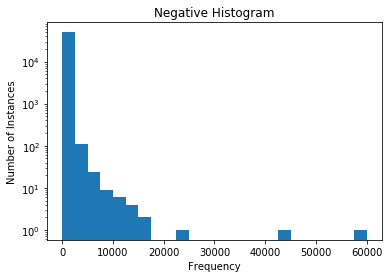

In [39]:
#negative data.
df_freq=pd.concat([train_final,test_final],ignore_index=True)

#vectorizing the data.
cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_neg = cv.fit_transform(df_freq[df_freq['label']==0].review)

#Visualizing positive reviews
data = hist_neg.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title('Negative Histogram')
plt.xlabel('Frequency')
plt.ylabel('Number of Instances')

# 2 Post Feature Selection.

In [40]:
#data set for feature selection
df_freq=pd.concat([train_final,test_final],ignore_index=True)

#calling the feature selction funtion.
word_list = get_feature(df_freq, 1000)

# Removing non prefered words from training and test combined data
count = 0
for sentence in df_freq['review']:
    sentence = [word for word in sentence.lower().split() if word in word_list]
    sentence = ' '.join(sentence)
    df_freq.loc[count, 'review'] = sentence
    count+=1

# 01. Word Cloud

Positive Sentiment.

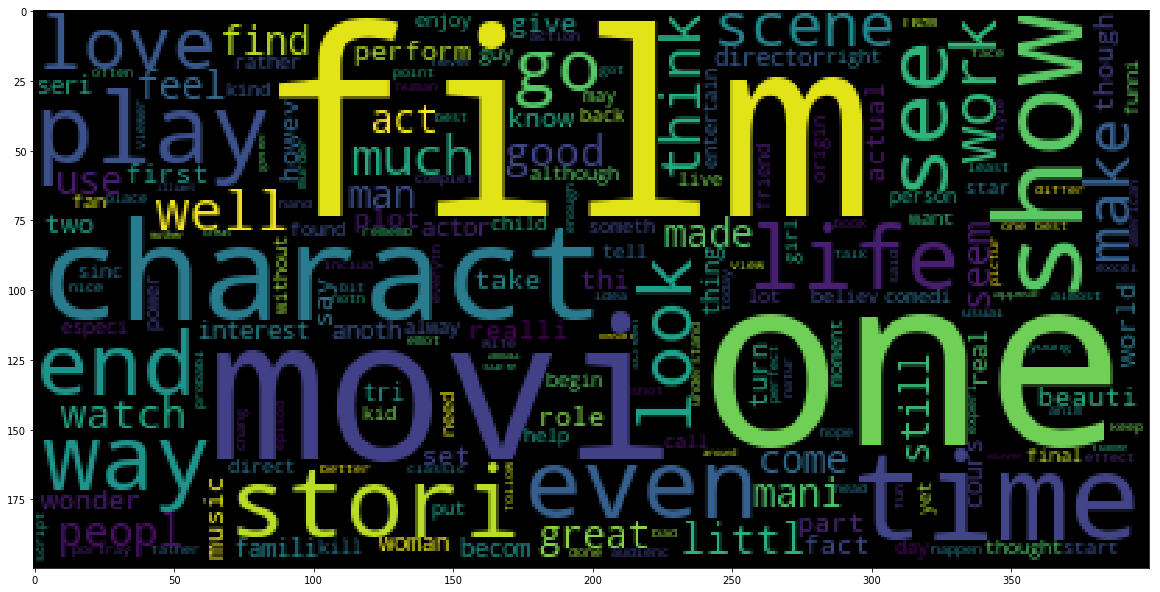

In [41]:
# Creating a list of train and test data to analyse
df_freq=pd.concat([train_final,test_final],ignore_index=True)
word_list = df_freq["review"][df_freq.label.isin(['1'])].unique().tolist()
text_list = " ".join(word_list)

# Create a word cloud for negative words
wordcloud = WordCloud().generate(text_list)

# Show the created image of word cloud
plt.figure(figsize=(20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.show()

Negative Sentiment.

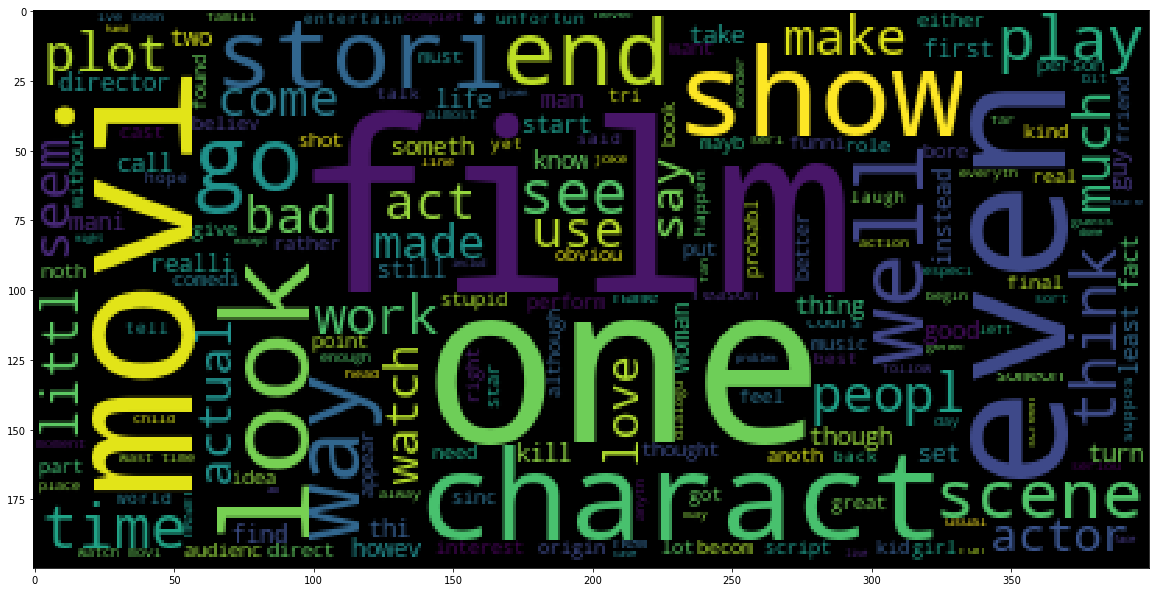

In [42]:
df_freq=pd.concat([train_final,test_final],ignore_index=True)
word_list = df_freq["review"][df_freq.label.isin(['0'])].unique().tolist()
text_list = " ".join(word_list)

# Create a word cloud for negative words
wordcloud = WordCloud().generate(text_list)

# Show the created image of word cloud
plt.figure(figsize=(20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.show()

# 02. Histogram Distribution.

Text(0,0.5,'Number of Instances')

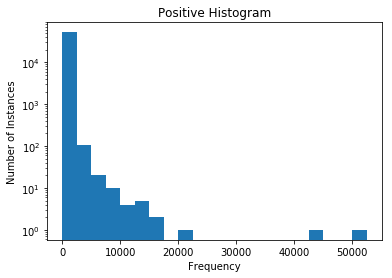

In [43]:
#positive data.
df_freq=pd.concat([train_final,test_final],ignore_index=True)

#vectorizing the data.
cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_pos = cv.fit_transform(df_freq[df_freq['label']==1].review)

#Visualizing positive reviews
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title('Positive Histogram')
plt.xlabel('Frequency')
plt.ylabel('Number of Instances')

Text(0,0.5,'Number of Instances')

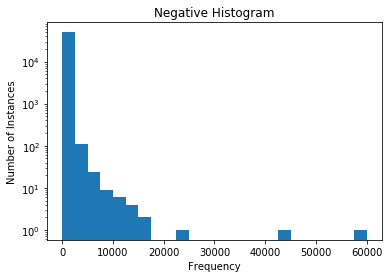

In [44]:
#negative data.
df_freq=pd.concat([train_final,test_final],ignore_index=True)

#vectorizing the data.
cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_neg = cv.fit_transform(df_freq[df_freq['label']==0].review)

#Visualizing positive reviews
data = hist_neg.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title('Negative Histogram')
plt.xlabel('Frequency')
plt.ylabel('Number of Instances')

# PHASE 05:Model Building

# 01:Supervised learning.

In [42]:
#vectorize the dataset.
tfidf=TfidfVectorizer(binary=True)
tfidf.fit(train_final.review)
X=tfidf.fit_transform(train_final.review)
X_test=tfidf.transform(test_final.review)

#encoding of target variable.
le = LabelEncoder()
y_train = le.fit_transform(train_final.label)
y_test= le.fit_transform(test_final.label)


# 1.Logistic Regression.

In [43]:
lr=LogisticRegression()
lr.fit(X,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
#prediction
y_pred=lr.predict(X_test)

In [45]:
## Create the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10938  1562]
 [ 1373 11127]]


From the confusion matrix result, we have 22065 correct predictions and 2935 incorrect predictions.

In [46]:
print('Accuracy of Logistics Regression:',accuracy_score(y_test,y_pred) )

Accuracy of Logistics Regression: 0.8826


# 2.Random Forest.

In [ ]:
#grid search cv to get best parameteres for random forest
rfc=RandomForestClassifier(random_state=0)
param_grid = { 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X,y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
#random forest with the best features from gridsearch cv
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [ ]:
#fitting the model
rfc1.fit(X,y_train)

In [ ]:
#predictions
y_pred1=rfc1.predict(X_test)

In [ ]:
## Create the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_final.label, y_pred1)
print(confusion_matrix)

From the confusion matrix result, we have 20918 correct predictions and 4082 incorrect predictions.

In [ ]:
#accuracy
print('Accuracy of Random Forest on CV data:', accuracy_score(test_final.label,y_pred1))

# 3. Support Vector Classifier

In [64]:
#svc model
svm=SVC()

#fit the model
svm.fit(X,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [65]:
#predictions
y_pred2=svm.predict(X_test)

In [66]:
## Create the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_final.label, y_pred2)
print(confusion_matrix)

[[ 4074  8426]
 [   94 12406]]


From the confusion matrix result, we have 16480 correct predictions and 8520 incorrect predictions.

In [67]:
print('Accuracy of SVC:', accuracy_score(test_final.label,y_pred2))

Accuracy of SVC: 0.6592


# 4.Naive Bayes Classifier.

In [68]:
#naive base model.
nbm=MultinomialNB()

#fitting the model.
nbm.fit(X,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [69]:
#prediction
y_pred3=nbm.predict(X_test)

In [70]:
## Create the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred3)
print(confusion_matrix)

[[10924  1576]
 [ 2654  9846]]


From the confusion matrix result, we have 20770 correct predictions and 4228 incorrect predictions.

In [71]:
print('Accuracy of Naive Bayes:', accuracy_score(y_test,y_pred3))

Accuracy of Naive Bayes: 0.8308


In [72]:
print('The accuracy of the classifier models.')
print('Accuracy of Logistics Regression:',accuracy_score(y_test,y_pred) )
print('Accuracy of Random Forest on CV data:', accuracy_score(y_test,y_pred1))
print('Accuracy of SVC:', accuracy_score(y_test,y_pred2))
print('Accuracy of Naive Bayes:', accuracy_score(y_test,y_pred3))

The accuracy of the classifier models.
Accuracy of Logistics Regression: 0.88292
Accuracy of Random Forest on CV data: 0.83672
Accuracy of SVC: 0.6592
Accuracy of Naive Bayes: 0.8308


# 02:Unsupervised Learning

# 1. Kmeans Clustering.

In [80]:
#kmeans clustering for unsupervised learning.
# Vectorizing dataset
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_final.review)
 
# Creating a k-means object and fitting it to target variable
k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=1,random_state=10)
model.fit(X)
 
# Visualising the 2 clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :2]:
        print(' %s' % terms[ind])
        

Top terms per cluster:
Cluster 0:
 film
 play
 movi
Cluster 1:
 funni
 comedi
 movi
Cluster 2:
 movi
 film
 like
Cluster 3:
 movi
 watch
 like
Cluster 4:
 movi
 bad
 like
Cluster 5:
 film
 like
 make


In [79]:
Y = vectorizer.transform(['it was worst'])
prediction = model.predict(Y)
print(prediction)

[2]
